# Does California Carbon Investment Intensify Green Gentrification?

Haoyu Yue, Urban Design and Planning, University of Washington

## Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import pyproj

In [2]:
%matplotlib widget
#%matplotlib inline

### Import Datasets

In [3]:
#carbon investment data
ca_line = gpd.read_file('data/capubdata/ca_line.gpkg')
ca_point = gpd.read_file('data/capubdata/ca_point.gpkg')
ca_polygon = gpd.read_file('data/capubdata/ca_polygon.gpkg')

Use Projected CRS, EPSG:3857, Name: WGS 84 / Pseudo-Mercator as main CRS. (From original investment dataset.)

In [4]:
#administration boundairs
sf_boundary = gpd.read_file('data/sf_boundaries.gpkg')
sf_boundary = sf_boundary.to_crs('EPSG:3857')

### Define global varibales

In [5]:
SFMSA = ["San Francisco","Marin","Contra Costa","Alameda","San Mateo"]
SFMSABOUNDARY = sf_boundary.total_bounds
SFMSA_EXTENT = [-13694976,-13521897,4454076,4624901]

## Exploration

In [6]:
#select all projects within SF MSA
sf_line = ca_line[ca_line['COUNTY_NAME'].str.contains(SFMSA[0]) | ca_line['COUNTY_NAME'].str.contains(SFMSA[1]) | ca_line['COUNTY_NAME'].str.contains(SFMSA[2]) | ca_line['COUNTY_NAME'].str.contains(SFMSA[3]) | ca_line['COUNTY_NAME'].str.contains(SFMSA[4])]
sf_point = ca_point[ca_point['COUNTY_NAME'].str.contains(SFMSA[0]) | ca_point['COUNTY_NAME'].str.contains(SFMSA[1]) | ca_point['COUNTY_NAME'].str.contains(SFMSA[2]) | ca_point['COUNTY_NAME'].str.contains(SFMSA[3]) | ca_point['COUNTY_NAME'].str.contains(SFMSA[4])]
sf_polygon = ca_polygon[ca_polygon['COUNTY_NAME'].str.contains(SFMSA[0]) | ca_polygon['COUNTY_NAME'].str.contains(SFMSA[1]) | ca_polygon['COUNTY_NAME'].str.contains(SFMSA[2]) | ca_polygon['COUNTY_NAME'].str.contains(SFMSA[3]) | ca_polygon['COUNTY_NAME'].str.contains(SFMSA[4])]

In [7]:
print(f'''There are {len(sf_polygon.proj_name.unique())} polygon projects, {len(sf_line.proj_name.unique())} line projects, and {len(sf_point.proj_name.unique())} point projects in SF MSA.''')

There are 26 polygon projects, 11 line projects, and 289 point projects in SF MSA.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
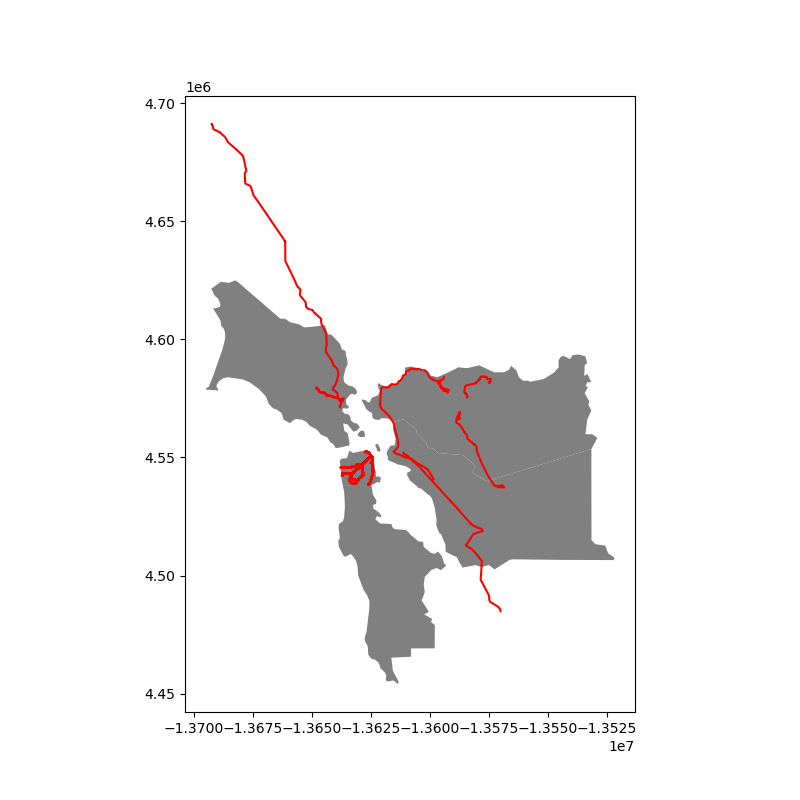

In [8]:
f,ax = plt.subplots(1,1,figsize=(8,8))
sf_line.plot(ax=ax,color='red')
sf_boundary.plot(ax=ax,color='gray')
plt.show()

In [9]:
sf_polygon.proj_name.unique()

array(['Building Climate Resiliency in Central Valley Wetlands, Phase 2',
       'East Oakland Sustainable Transportation to Martin Luther King Jr. Shoreline',
       'Purchase Three (3) 40 Foot Diesel Electric Hybrid Buses',
       'Enhancing Wildlife Habitat and Carbon Sequestration on Working Lands',
       'Clean Vehicle Rebate Project',
       'Dublin/Pleasanton Capacity Improvement and Congestion Reduction Program',
       'HDMAP Richmond',
       'Building Climate Resiliency in Central Valley Wetlands',
       'EFMP Plus-Up', 'Clean Vehicle Rebate Project (CVRP)', 'CVRP',
       'Local Financing Assistance Program',
       'Local Financing Assistance Pilot Project',
       'Statewide Financing Assistance Pilot Project',
       'Community Housing Development Corporation Financing Assistance Pilot Project (Financing Assistance Pilot Project)',
       'WaterLink-San Francisco Bay Area',
       'Large Multi-Family Energy Efficiency and Renewables',
       'Multi-Family Energy Effici

In [10]:
sf_line.proj_name.unique()

array(['East Bay Bus Rapid Transit', 'Martinez Shuttle',
       'Continue Expanded Service Route 201',
       'Purchase Two (2) Hybrid Replacement Buses', 'MCTD 2016',
       'Expanding the SFMTA Light Rail Vehicle Fleet Project',
       'SMART Rail Car Capacity Project', 'Travel Time Reduction Project',
       'MCTD 23x Transit Expansion', 'Transit Capacity Expansion Program',
       'Dublin/Pleasanton Capacity Improvement and Congestion Reduction Program'],
      dtype=object)

In [11]:
sf_point.proj_name.unique()

array(['The Model Oakland Green Schoolyard at Cesar E. Chavez Education Center Project',
       'City of Oakland Tree Inventory, Urban Forest Master Plan, and Tree Planting Project',
       'Healthy Trees, Healthy Kids!, Phase 3', 'Greening San Francisco',
       'BART-to-Antioch Operating Funds', 'East Bay Bus Rapid Transit',
       'Maintenance Facility Upgrades for Fuel Cell Electric Buses',
       'Wi-Fi for Bus and Paratransit Rider Connectivity',
       'Free Fares for Routes 11, 14, and 16 Serving the Monument Corridor',
       'Purchase Four (4) Zero-Emission Replacement Buses and Related Support Infrastructure',
       'Martinez Amtrak to BART III', 'Reduced Fares',
       'NVTA Zero Emission Bus Electrification',
       'Peninsula Corridor Electrification Project',
       'Capital Costs for the Express Bus Pilot Project',
       '27 Bryant Tenderloin Transit Reliability Project',
       'Electric Bus Procurement',
       'Free Muni for Seniors and People with Disabilities',
 

In [12]:
sf_line

,OBJECTID,reportingcyclename,proj_id,agency,role_subprogram_id,subprogram_name,proj_name,proj_desc,census_tract,total_ggrf_funding,est_ghg_reductions,proj_benefits_desc,senate_district,assembly_district,COUNTY_NAME,BENEFITS_PRIORITY_YN,Shape_Length,geometry
39,40,2016,15-16-D4-36,Department of Transportation,68,Low Carbon Transit Operations Program,East Bay Bus Rapid Transit,Purchase and install 120 Transit Signal Priori...,,1948597.0,371444,,09,18,Alameda,Yes,1.863578e+04,MULTILINESTRING Z ((-13610940.980 4552288.434 ...
40,41,2016,15-16-D4-37,Department of Transportation,68,Low Carbon Transit Operations Program,Martinez Shuttle,Continuation of project that expands access to...,,308009.0,27,,03,14,Contra Costa,Yes,1.699683e+04,MULTILINESTRING Z ((-13596241.183 4582298.328 ...
50,51,2016,15-16-D4-43,Department of Transportation,68,Low Carbon Transit Operations Program,Continue Expanded Service Route 201,Continue operating Route 201 expanded service ...,,354460.0,82,,07,14,Contra Costa,Yes,2.469129e+04,MULTILINESTRING Z ((-13584254.902 4575766.545 ...
51,52,2016,15-16-D4-45,Department of Transportation,68,Low Carbon Transit Operations Program,Purchase Two (2) Hybrid Replacement Buses,The purchase of two (2) hybrid 40' buses to re...,,253365.0,4595,,07,"14, 16","Alameda, Contra Costa",No,4.671753e+04,MULTILINESTRING Z ((-13569653.041 4537374.853 ...
52,53,2016,15-16-D4-46,Department of Transportation,68,Low Carbon Transit Operations Program,MCTD 2016,Add new service on Route 23 to provide express...,,275413.0,66,,02,10,Marin,No,2.798124e+04,MULTILINESTRING Z ((-13637760.822 4574181.671 ...
260,261,2016,0016000121,California State Transportation Agency,78,Transit and Intercity Rail Capital Program,Expanding the SFMTA Light Rail Vehicle Fleet P...,The purchase of 8 zero-emission light rail veh...,,41181000.0,24429,Integration with transit ; improved service; r...,11,"17, 19",San Francisco,Yes,1.608415e+06,MULTILINESTRING Z ((-13624930.931 4547965.057 ...
263,264,2016,0016000237,California State Transportation Agency,78,Transit and Intercity Rail Capital Program,SMART Rail Car Capacity Project,Leverages a one-time opportunity to purchase 3...,,11000000.0,82630,Integration with rail and transit,"02, 03","02, 04, 10","Marin, Sonoma",No,1.494045e+05,MULTILINESTRING Z ((-13689533.750 4687970.011 ...
278,279,2016,0016000276,California State Transportation Agency,78,Transit and Intercity Rail Capital Program,Travel Time Reduction Project,Partners with Union Pacific Rail Road and Alta...,,4620000.0,24747,Integration with rail and transit,"03, 09, 10, 15","14, 15, 18, 20, 25, 27, 28","Alameda, Contra Costa, Santa Clara",Yes,1.608335e+05,MULTILINESTRING Z ((-13602903.063 4586930.749 ...
313,314,2017,16-17-D04-040,Department of Transportation,68,Low Carbon Transit Operations Program,Martinez Shuttle,Continuation of project that expands access to...,,285190.0,4,,03,14,Contra Costa,Yes,1.510131e+04,MULTILINESTRING Z ((-13594558.991 4578992.670 ...
316,317,2017,16-17-D04-045,Department of Transportation,68,Low Carbon Transit Operations Program,MCTD 23x Transit Expansion,Operate new service on Route 23x to provide ex...,,128676.0,19,,02,10,Marin,No,2.676445e+04,MULTILINESTRING Z ((-13638384.926 4574632.729 ...


In [13]:
sf_line[['reportingcyclename', 'agency', 'subprogram_name', 'proj_name', 
         'proj_desc', 'total_ggrf_funding', 'est_ghg_reductions',
         'COUNTY_NAME', 'BENEFITS_PRIORITY_YN']]

,reportingcyclename,agency,subprogram_name,proj_name,proj_desc,total_ggrf_funding,est_ghg_reductions,COUNTY_NAME,BENEFITS_PRIORITY_YN
39,2016,Department of Transportation,Low Carbon Transit Operations Program,East Bay Bus Rapid Transit,Purchase and install 120 Transit Signal Priori...,1948597.0,371444,Alameda,Yes
40,2016,Department of Transportation,Low Carbon Transit Operations Program,Martinez Shuttle,Continuation of project that expands access to...,308009.0,27,Contra Costa,Yes
50,2016,Department of Transportation,Low Carbon Transit Operations Program,Continue Expanded Service Route 201,Continue operating Route 201 expanded service ...,354460.0,82,Contra Costa,Yes
51,2016,Department of Transportation,Low Carbon Transit Operations Program,Purchase Two (2) Hybrid Replacement Buses,The purchase of two (2) hybrid 40' buses to re...,253365.0,4595,"Alameda, Contra Costa",No
52,2016,Department of Transportation,Low Carbon Transit Operations Program,MCTD 2016,Add new service on Route 23 to provide express...,275413.0,66,Marin,No
260,2016,California State Transportation Agency,Transit and Intercity Rail Capital Program,Expanding the SFMTA Light Rail Vehicle Fleet P...,The purchase of 8 zero-emission light rail veh...,41181000.0,24429,San Francisco,Yes
263,2016,California State Transportation Agency,Transit and Intercity Rail Capital Program,SMART Rail Car Capacity Project,Leverages a one-time opportunity to purchase 3...,11000000.0,82630,"Marin, Sonoma",No
278,2016,California State Transportation Agency,Transit and Intercity Rail Capital Program,Travel Time Reduction Project,Partners with Union Pacific Rail Road and Alta...,4620000.0,24747,"Alameda, Contra Costa, Santa Clara",Yes
313,2017,Department of Transportation,Low Carbon Transit Operations Program,Martinez Shuttle,Continuation of project that expands access to...,285190.0,4,Contra Costa,Yes
316,2017,Department of Transportation,Low Carbon Transit Operations Program,MCTD 23x Transit Expansion,Operate new service on Route 23x to provide ex...,128676.0,19,Marin,No


In [15]:
len(sf_line)

20

In [16]:
len(sf_polygon)

19350

In [ ]:
len(sf_point)